<a href="https://colab.research.google.com/github/space-debris/Plant-growth-analyser/blob/main/svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/space-debris/Plant-growth-analyser/main/dataset.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
Y = Y.reshape(len(Y),1)

Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

Training the SVR model

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [7]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[35.20862512]])

Visualising SVR result

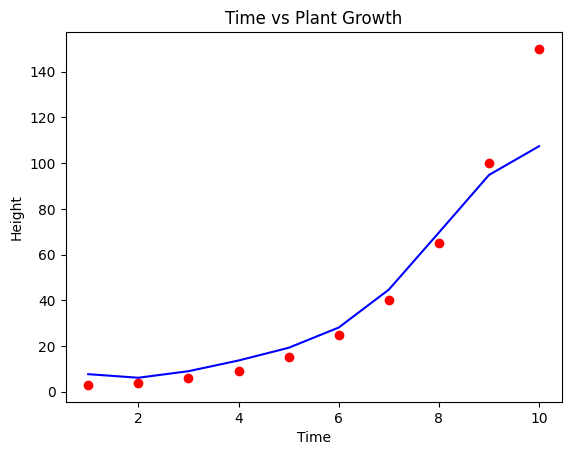

In [8]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color="red")
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)),color="blue")
plt.title("Time vs Plant Growth")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()

High Resolution curve

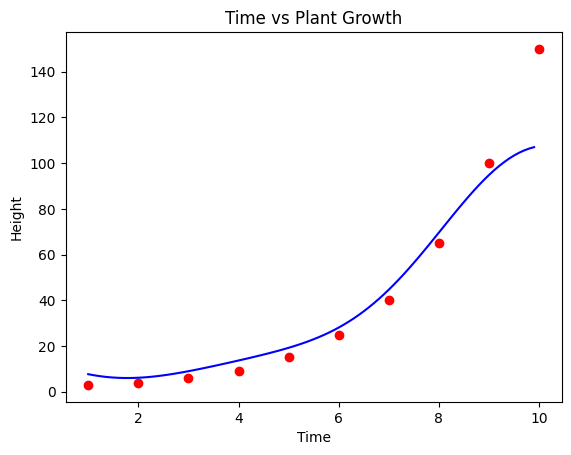

In [16]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color = "red")
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color = "blue")
plt.title("Time vs Plant Growth")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()